Used Libraries:

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels as sm
import os

In [16]:
# Erstellen des DataFrames und der einzelnen Parameter
auswertung_raw = pd.read_csv('SP_Abfrage_120319.txt', delimiter = ';', usecols = [2,3,4,5,6,7,8,9,10,11,12])
auswertung = auswertung_raw.dropna()
header_arr = auswertung.columns.get_values()
header = header_arr.tolist()
#modvig = auswertung.modvig
#sed = auswertung.sed
#max_v = auswertung.max_v
#hf4 = auswertung.hf4
#hf2 = auswertung.hf2
v2 = auswertung.v2
v4 = auswertung.v4
#max_lac = auswertung.max_lac
#age = auswertung.age
#sex = auswertung.sex
cud_p1_lvf = auswertung.CUD_P1_LVF
cud_n1_lvf = auswertung.CUD_N1_LVF
cud_p1_rvf = auswertung.CUD_P1_RVF
cud_n1_rvf = auswertung.CUD_N1_RVF
enmo = auswertung.ENMO
mvpa_1_120 = auswertung.MVPA_1_120
mvpa_5_120 = auswertung.MVPA_5_120
mvpa_10_120 = auswertung.MVPA_10_120
age = auswertung.age
#mass = auswertung.mass
#auswertung['height'] = auswertung.height/100
#height_sqr = auswertung.height**2
#auswertung['bmi'] = round(mass/(height_sqr), 2)
#auswertung['rel_pa'] = round(mvpa_1_100 / auswertung.bmi, 2)

actigraphie = [enmo, mvpa_1_120, mvpa_5_120, mvpa_10_120, v2, v4]
ihtt = [cud_n1_lvf, cud_n1_rvf, cud_p1_lvf, cud_p1_rvf]

#print(auswertung.info())
print(auswertung)


    CUD_N1_LVF  CUD_N1_RVF  CUD_P1_LVF  CUD_P1_RVF    v2    v4   ENMO  \
0        38.06       33.18       46.85       55.63  1.80  1.96  26.74   
1        38.06       39.04       65.39       49.78  2.63  3.05  28.60   
2        37.09       31.23       38.06       61.49  1.78  1.92  19.57   
3        86.86      114.19       76.13       71.25  1.69  1.99  20.87   
4        90.77       40.99       82.96       76.13  1.51  1.74  21.83   
5        81.01       85.89       69.30       66.37  1.87  2.20  21.36   
6         4.88       44.90       13.66       43.92  2.62  2.91  35.10   
7        -4.88       49.78        0.98       40.02  1.49  1.71  27.25   
8        34.16       -3.90       28.30      -17.57  1.79  1.95  36.62   
10       66.37       80.03       93.70       81.98  1.81  2.01  37.36   
11       71.25       64.42       87.84       69.30  1.52  1.88  26.35   
12       77.10       77.10       81.98       83.94  2.37  2.81  31.72   
13       30.26       40.99       54.66       63.44 

In [132]:
desc_stat = auswertung.describe()
desc_stat.to_csv('desc_stats.csv')

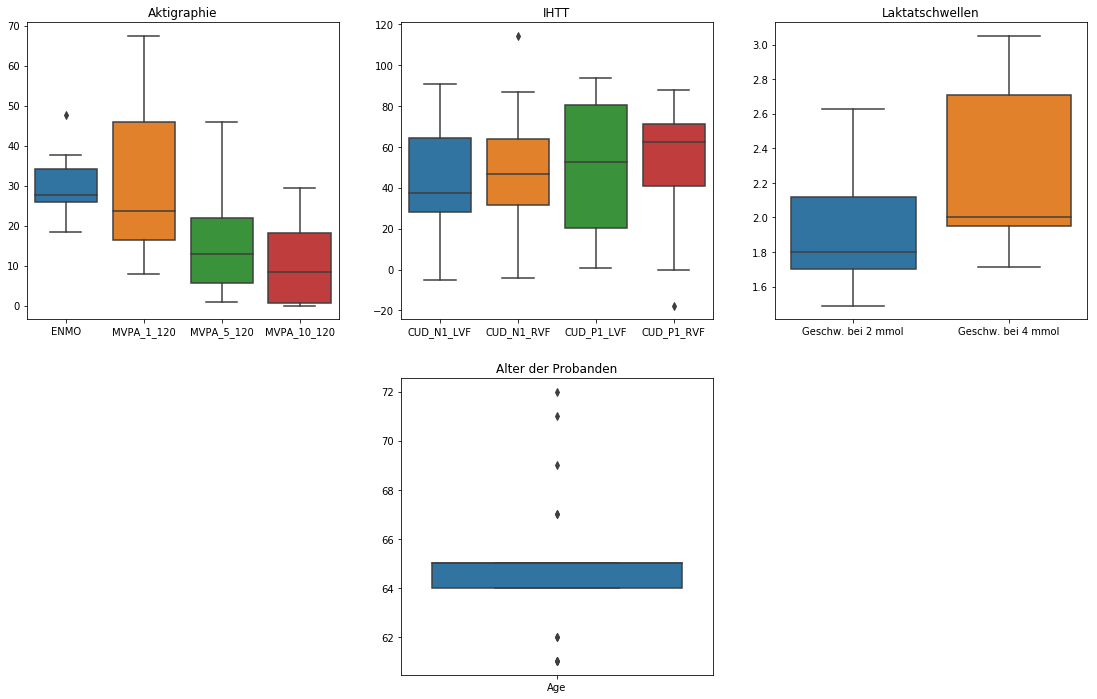

In [123]:
fig = plt.figure(figsize = (19,12))

#plt.subplots_adjust(left = 0.125, right = 2.5, bottom = 0.2, top = 2.5, wspace = 0.1, hspace = 0.2)

ax = fig.add_subplot(2,3,1)
ax.set_title("Aktigraphie")
sns.boxplot(y = [enmo, mvpa_1_120, mvpa_5_120, mvpa_10_120],
            x = ["ENMO", "MVPA_1_120", "MVPA_5_120", "MVPA_10_120"],
            whis = 1.5) # whis = 1.5 (default) =>  Faktor * Interquartile Range (IQR) werden als Outlier markiert 

ax = fig.add_subplot(2,3,2)
ax.set_title("IHTT")
sns.boxplot(y = [cud_n1_lvf, cud_n1_rvf, cud_p1_lvf, cud_p1_rvf],
            x = ["CUD_N1_LVF", "CUD_N1_RVF", "CUD_P1_LVF", "CUD_P1_RVF"],
            whis = 1.5)

ax = fig.add_subplot(2,3,3)
ax.set_title("Laktatschwellen")
sns.boxplot(y = [v2, v4],
            x = ["Geschw. bei 2 mmol", "Geschw. bei 4 mmol"],
            whis = 1.5)

ax = fig.add_subplot(2,3,5)
ax.set_title("Alter der Probanden")
sns.boxplot(y = [age],
            x = ["Age"],
            whis = 1.5)

fig.savefig("boxplots.png")

In [77]:
outliers=[]

def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(cud_p1_rvf)
print(outlier_datapoints)

[-17.57, 0.0]


In [148]:
# Histogram für Normalverteilung
#def normal_dist(array, title='', xlabel='', ylabel=''):
#    maximum = (max(array))
#    minimum = (min(array))
#    bins = n
#    rge = (minimum, maximum)
#    plt.hist(array, range = (rge))
#    plt.title(title)
#    plt.xlabel(xlabel)
#    plt.ylabel(ylabel)
#    plt.show()

In [33]:
## Linear Regression
#def linear_regr(x,y):
#    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#    print("r-squared: %f" % r_value**2)
#    plt.plot(x, y, 'o', label='original data')
#    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
#    plt.legend()
#    plt.show()
    
    
# Spearman, Pearson = linear Regression
#def correlation(parameter1, parameter2):
#   norm = shapiro(parameter1, parameter2)
#   #norm_dist(parameter1)
#   #norm_dist(parameter2)
#   #print(dist_par1)
#   #print(dist_par2)
#   #linear_regr(parameter1, parameter2)
#   if norm == True:
#       r, pval = stats.pearsonr(parameter1, parameter2)
#       print("r = {}, p = {}".format(r, pval))
#       if pval < 0.05:
#           print("Die Korrelation ist signifikant!")
#       else:
#           print("Es liegt kein signifikanter Zusammenhang vor!")
#   else:
#       r, pval = stats.spearmanr(parameter1, parameter2)
#       print("r = {}, p = {}".format(round(r, 3), round(pval)))
#       if pval < 0.05:
#           print("Die Korrelation ist signifikant!")
#       else:
#           print("Es liegt kein signifikanter Zusammenhang vor!")


In [210]:
# Distribution Test Shapiro
# H0 = Normalverteilung wird angenommen p > 0.05
# H1 = keine Normalverteilung p < 0.05
def shapiro(parameter1, parameter2):
    name1 = parameter1.name
    name2 = parameter2.name
    statval1, pval1 = stats.shapiro(parameter1)
    statval2, pval2 = stats.shapiro(parameter2)
    #print("Berechnung wird durchgeführt für: " + name1 + ", " + name2)
    if pval1 > 0.05 and pval2 > 0.05:
        #print("Beide Parameter sind normal verteilt!")
        #print("{}: p = {}".format(name1, round(pval1, 3)))
        #print("{}: p = {}".format(name2, round(pval2, 3)))
        return True
    else:
        #print("Mindestens ein Parameter ist nicht normal verteilt!")
        #print("{}: p = {}".format(name1, round(pval1, 3)))
        #print("{}: p = {}".format(name2, round(pval2, 3)))
        return False

def plot_corr(var1, var2):
    sd_var2 = np.std(var2)  # Standard Deviation of Variable 2, for SEE calculation
    shapiro(var1,var2)
    statval1, pval1 = stats.shapiro(var1)
    statval2, pval2 = stats.shapiro(var2)
    if shapiro == True:
        r, pval_corr = stats.pearsonr(var1, var2)
    else:
        r, pval_corr = stats.spearmanr(var1, var2)
    se_e = sd_var2*(np.sqrt(1-r**2))  # standard error of estimate calculation (se = sy * sqrt(r**2))
    #print('R: {}, Standard Error of Estimate: {}'.format(round(r, 3), round(se_e, 3)))
    
        
    # Graphische Aufarbeitung
    fig = plt.figure(figsize = (20,5))

    #plt.subplots_adjust(left = 0.125, right = 2.5, bottom = 0.1, top = 1, wspace = 0.2, hspace = 0.3)
    
    ax = fig.add_subplot(1,3,1)
    plt.title('Correlation: {} & {}, r = {}, R² = {}, p = {}'.format(var1.name, var2.name, round(r,3), round(r**2, 3), round(pval_corr, 3)))
    sns.regplot(var1, var2)
    
    ax = fig.add_subplot(1,3,2)
    plt.title('Verteilung {}, p = {}'.format(var1.name, round(pval1, 3)))
    sns.distplot(var1, fit = stats.norm)

    ax = fig.add_subplot(1,3,3)
    plt.title('Verteilung {}, p = {}'.format(var2.name, round(pval2, 3)))
    sns.distplot(var2, fit = stats.norm)
    
    filename = "corr_{}_{}.png".format(var1.name, var2.name)
    os.chdir('C:/Users/timfe/OneDrive - Deutsche Sporthochschule Köln/python_projects/BA_stichprobe/Auswertung/pictures')
    fig.savefig(filename)
    plt.close(fig)



for var1 in actigraphie:
    for var2 in ihtt:
        plot_corr(var1, var2)

In [208]:
def desc_corr(var1, var2):
    index_name = "{} & {}".format(var2.name, var1.name)
    df = pd.DataFrame(index = [index_name])
    sd_var2 = np.std(var2)  # Standard Deviation of Variable 2, for SEE calculation
    dist = shapiro(var1,var2) # True = Normalverteilung; False = keine Normalverteilung
    statval1, pval1 = stats.shapiro(var1)
    statval2, pval2 = stats.shapiro(var2)
    r_pear, pval_pear = stats.pearsonr(var1, var2)
    r_spear, pval_spear = stats.spearmanr(var1,var2)
    #se_e = sd_var2*(np.sqrt(1-r**2))  # standard error of estimate calculation (se = sy * sqrt(r**2))

    if dist == True:
        se_e = sd_var2*(np.sqrt(1-r_pear**2))
        df["p_value"] = pval_pear
        df["r"] = r_pear
        df["dist"] = "para"
        df["Test"] = "Pearson"
        df["r-square"] = r_pear**2
        df["standard_error_estimate"] = se_e
    else:
        se_e = sd_var2*(np.sqrt(1-r_spear**2))
        df["p_value"] = pval_spear
        df["r"] = r_spear
        df["dist"] = "non-para"
        df["Test"] = "Spearman"
        df["r-square"] = r_spear**2
        df["standard_error_estimate"] = se_e
    df.round(3)
    return df

df_all = pd.DataFrame()
for var1 in actigraphie:
    for var2 in ihtt:
        df = desc_corr(var1, var2)
        df_all = df_all.append(df, ignore_index = False)

sig_df = df_all[df_all.p_value <= 0.05].round(3)
non_sig_df = df_all[df_all.p_value > 0.05].round(3)

os.chdir('C:/Users/timfe/OneDrive - Deutsche Sporthochschule Köln/python_projects/BA_stichprobe/Auswertung/descriptive')
#sig_df.to_csv("significant_correlations.csv")
#df_all.to_csv("all_correlations.csv")
with pd.ExcelWriter('correlations.xlsx') as writer:  # doctest: +SKIP
    sig_df.to_excel(writer, sheet_name = "significant_correlations") # doctest: +SKIP
    df_all.to_excel(writer ,sheet_name = "all_correlations") # doctest: +SKIP

In [194]:
"""
Partial Correlation in Python (clone of Matlab's partialcorr)

This uses the linear regression approach to compute the partial 
correlation (might be slow for a huge number of variables). The 
algorithm is detailed here:

    http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression

Taking X and Y two variables of interest and Z the matrix with all the variable minus {X, Y},
the algorithm can be summarized as

    1) perform a normal linear least-squares regression with X as the target and Z as the predictor
    2) calculate the residuals in Step #1
    3) perform a normal linear least-squares regression with Y as the target and Z as the predictor
    4) calculate the residuals in Step #3
    5) calculate the correlation coefficient between the residuals from Steps #2 and #4; 

    The result is the partial correlation between X and Y while controlling for the effect of Z


Date: Nov 2014
Author: Fabian Pedregosa-Izquierdo, f@bianp.net
Testing: Valentina Borghesani, valentinaborghesani@gmail.com
"""

import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.


    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable


    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

#partial_corr(auswertung)

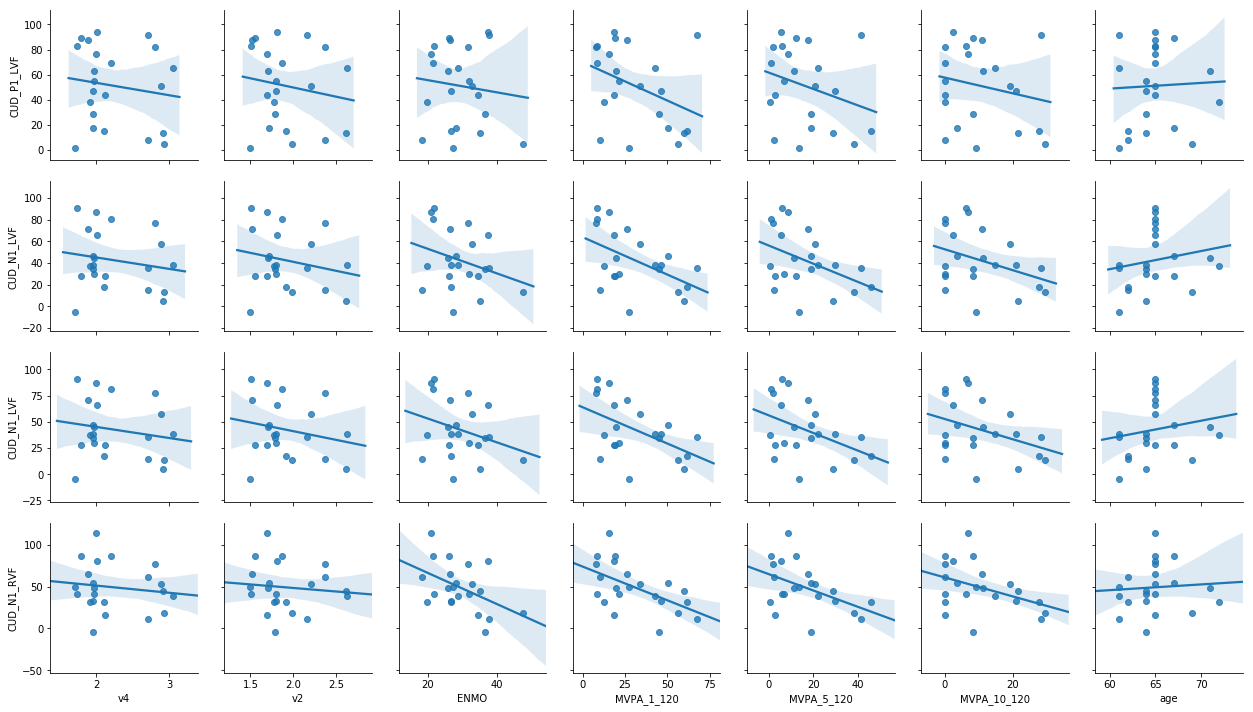

In [18]:
# from https://seaborn.pydata.org/tutorial/axis_grids.html
x_var = ["v4", "v2", "ENMO", "MVPA_1_120", "MVPA_5_120", "MVPA_10_120", "age"]
y_var = ["CUD_P1_LVF", "CUD_N1_LVF", "CUD_N1_LVF", "CUD_N1_RVF"]
reg_plot = sns.pairplot(auswertung, kind = 'reg', diag_kind = 'kde',
                        x_vars = x_var,
                       y_vars = y_var)

reg_plot.savefig("output_T120.png")

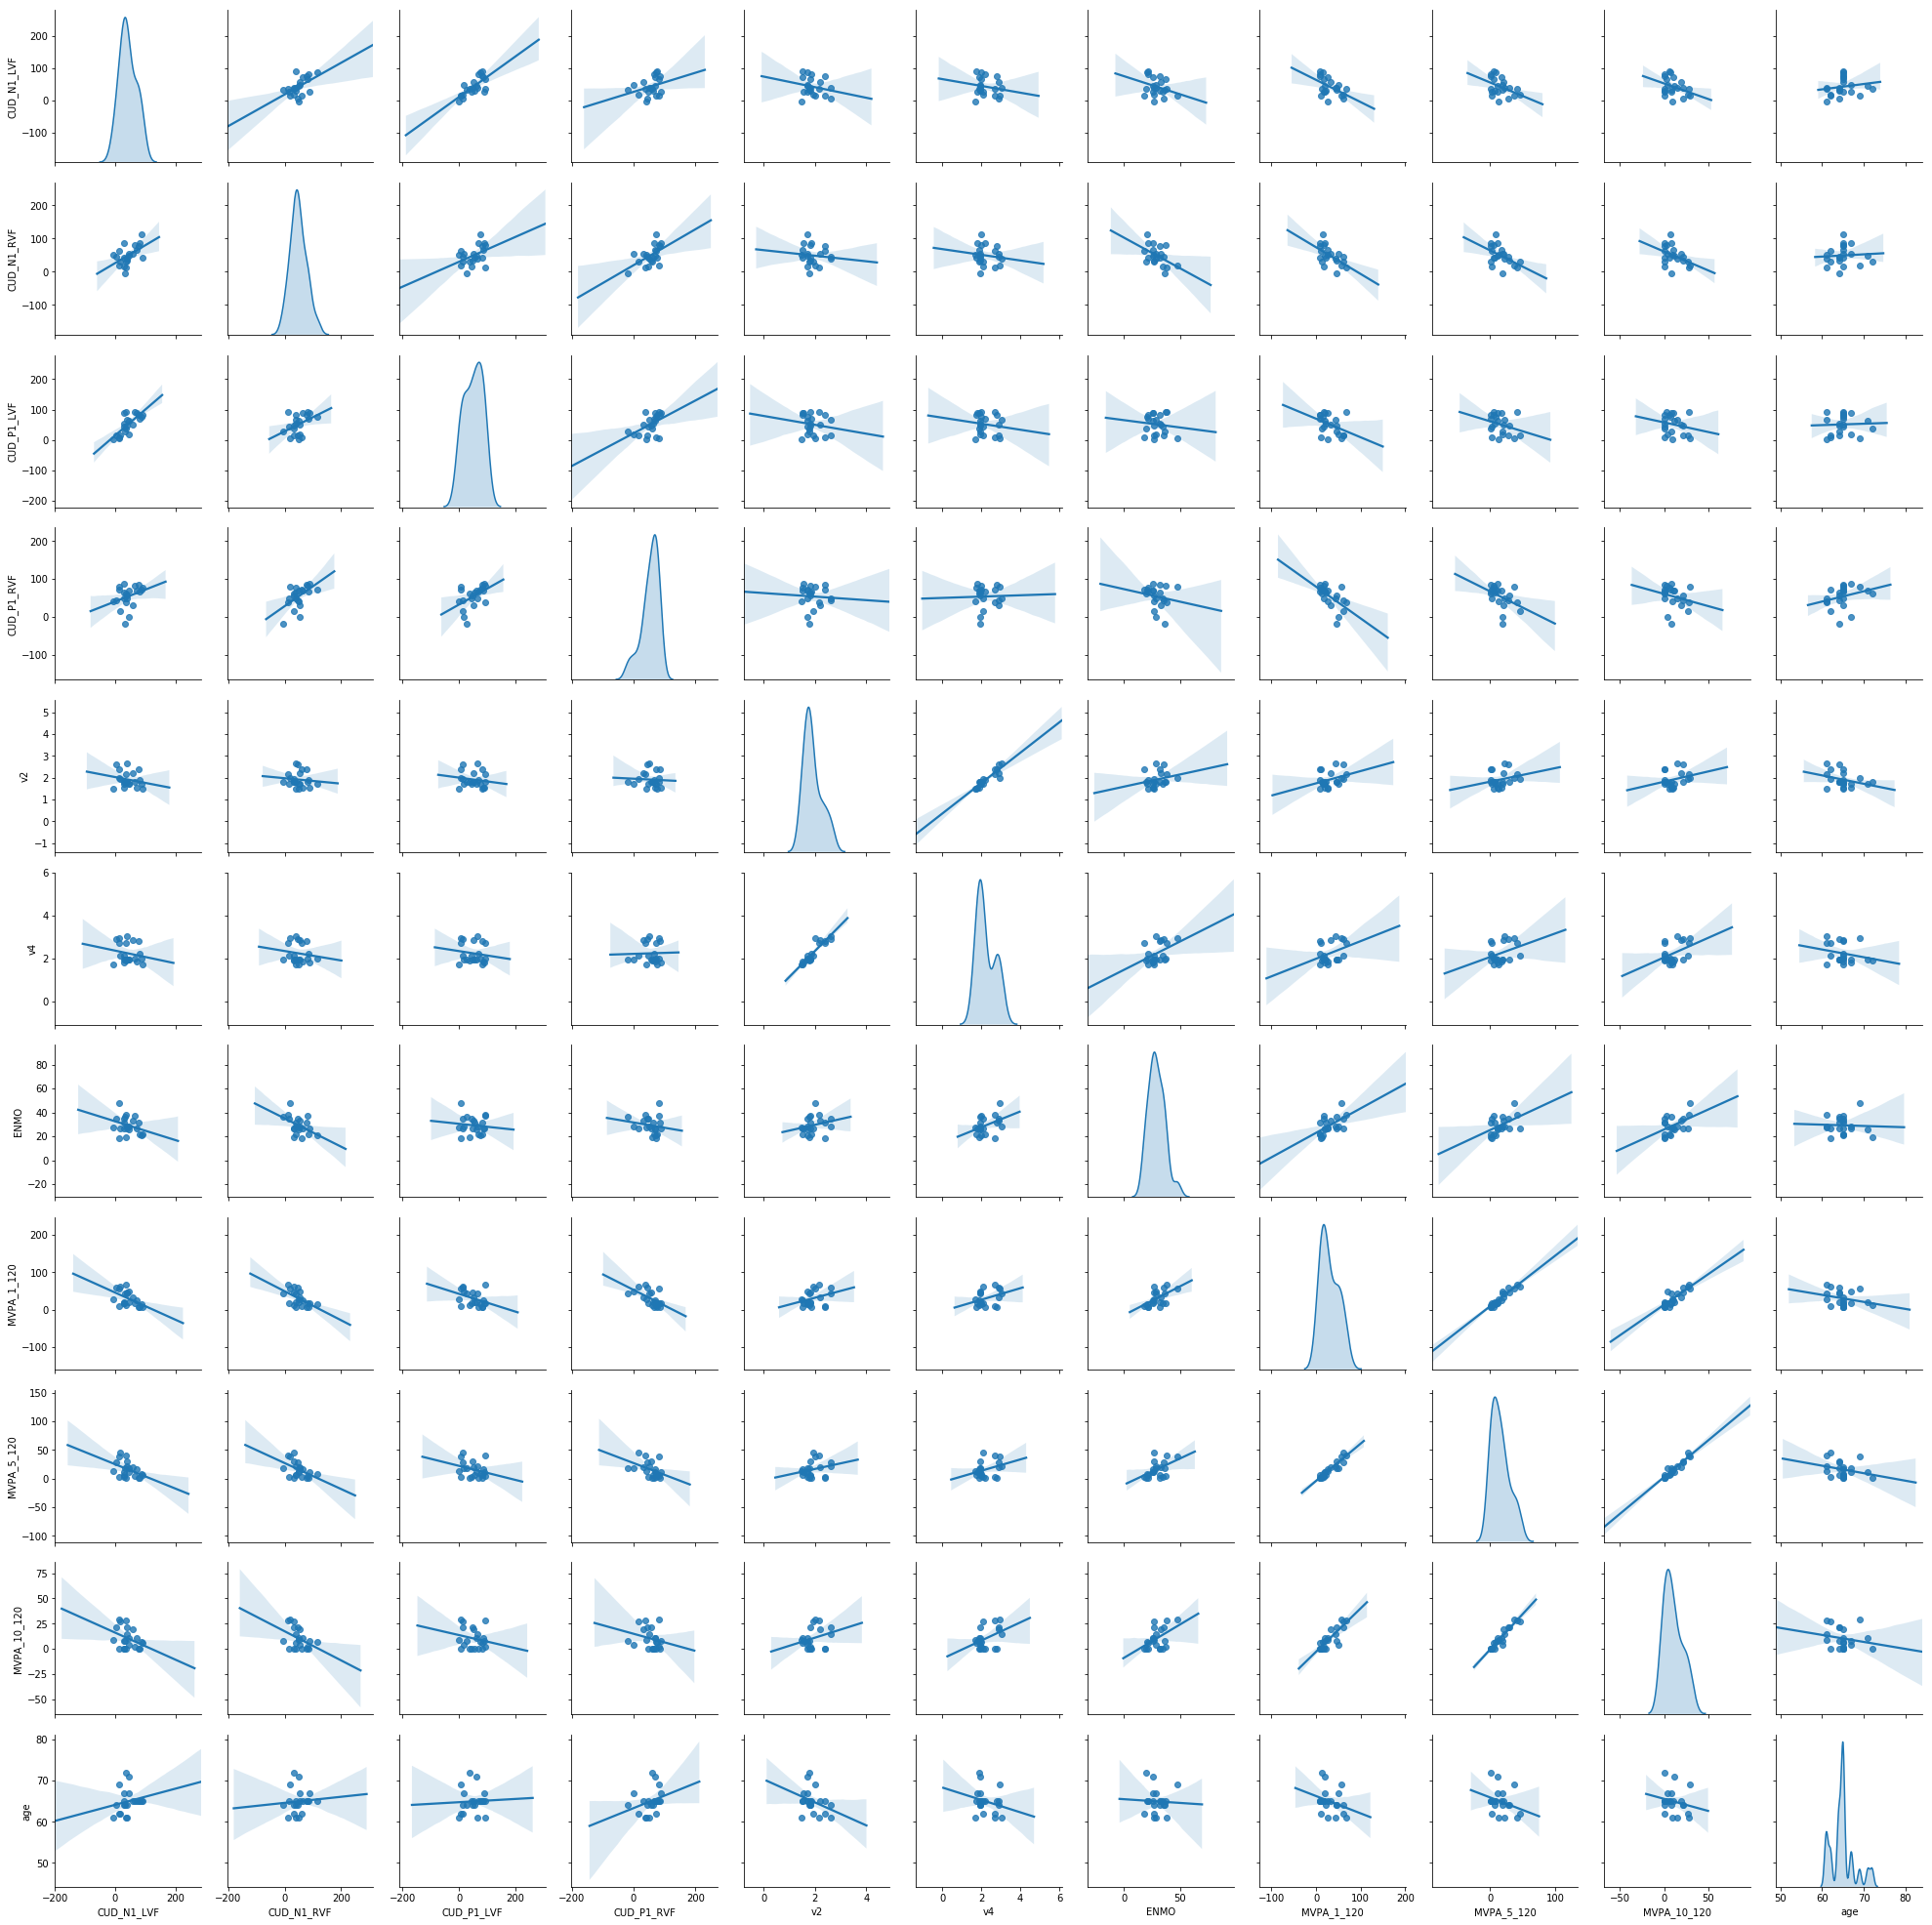

In [19]:
corr_plot = sns.pairplot(auswertung, kind = 'reg', diag_kind = 'kde')
corr_plot.savefig("partial_corr_T120.png")